In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import os.path
import shutil
SRC_DIR = 'original'
DEST_DIR = 'muenchen'

%matplotlib inline
# plt.style.use('seaborn')

In [2]:
routes_cols = {
    'route_long_name': str,
    'route_short_name': str,
    'agency_id': np.int64,
    'route_type': np.int64,
    'route_id': np.int64
}
routes = pd.read_csv(os.path.join(SRC_DIR, 'routes.txt'), dtype=routes_cols)

In [3]:
trips_cols = {
    'route_id': np.int64,
    'service_id': np.int64,
    'direction_id': np.int64,
    'trip_id': np.int64
}
trips = pd.read_csv(os.path.join(SRC_DIR, 'trips.txt'), dtype=trips_cols)

In [4]:
agency_cols = {
    'agency_id': np.int64,
    'agency_name': str,
    'agency_url': str,
    'agency_timezone': str,
    'agency_lang': str
}
agency = pd.read_csv(os.path.join(SRC_DIR, 'agency.txt'), dtype=agency_cols)

In [5]:
stops_cols = {
    'stop_name': str,
    'stop_id': np.int64,
    'stop_lat': np.float64,
    'stop_lon': np.float64
}
stops = pd.read_csv(os.path.join(SRC_DIR, 'stops.txt'), dtype=stops_cols)

In [6]:
stop_times_cols = {
    'trip_id': np.int64,
    'arrival_time': str,
    'departure_time': str,
    'stop_id': np.int64,
    'stop_sequence': np.int64,
    'pickup_type': np.float64,
    'drop_off_type': np.float64
}
stop_times = pd.read_csv(os.path.join(SRC_DIR, 'stop_times.txt'), dtype=stop_times_cols)

In [7]:
agency[agency['agency_id'] == 73]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
86,73,DB Regio AG Bayern,https://www.bahn.de,Europe/Berlin,de


In [8]:
routes_sbahn = routes.loc[
    (routes['agency_id'] == 73) &
    (routes['route_long_name'].str.startswith('S')) &
    ~(routes['route_long_name'].str.fullmatch('S60')) &
    ~(routes['route_long_name'].str.fullmatch('S5'))
]
del routes
routes_sbahn

,route_long_name,route_short_name,agency_id,route_type,route_id
773,S1,S1,73,2,134
794,S2,S2,73,2,94
797,S20,S20,73,2,773
811,S3,S3,73,2,135
825,S4,S4,73,2,132
858,S6,S6,73,2,34
871,S7,S7,73,2,105
880,S8,S8,73,2,11


In [9]:
calendar_cols = {
    'monday': np.int64,
    'tuesday': np.int64,
    'wednesday': np.int64,
    'thursday': np.int64,
    'friday': np.int64,
    'saturday': np.int64,
    'sunday': np.int64,
    'start_date': np.int64,
    'end_date': np.int64,
    'service_id': np.int64
}
calendar = pd.read_csv(os.path.join(SRC_DIR, 'calendar.txt'), dtype=calendar_cols)

In [10]:
trips_sbahn = pd.merge(routes_sbahn.loc[:, 'route_id'], trips, on='route_id', how='inner')
del trips
trips_sbahn

,route_id,service_id,direction_id,trip_id
0,134,100,0,10678
1,134,100,0,11996
2,134,100,0,12411
3,134,100,0,12826
4,134,100,0,13608
...,...,...,...,...
4318,11,98,0,35196
4319,11,98,0,35862
4320,11,98,0,42906
4321,11,98,0,67467


In [11]:
stop_times_sbahn = pd.merge(trips_sbahn.loc[:, 'trip_id'], stop_times, on='trip_id', how='inner')
del stop_times
stop_times_sbahn

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,10678,16:51:00,16:51:00,972,0,NaN,NaN
1,10678,16:52:00,16:53:00,13903,1,NaN,NaN
2,10678,16:59:00,17:04:00,9080,2,NaN,NaN
3,10678,17:07:00,17:07:00,1576,3,NaN,NaN
4,10678,17:10:00,17:10:00,3263,4,NaN,NaN
...,...,...,...,...,...,...,...
79170,70929,22:16:00,22:17:00,13692,18,NaN,NaN
79171,70929,22:18:00,22:19:00,13337,19,NaN,NaN
79172,70929,22:20:00,22:20:00,5508,20,NaN,NaN
79173,70929,22:22:00,22:22:00,8257,21,NaN,NaN


In [12]:
stops_sbahn = pd.merge(stop_times_sbahn.loc[:, 'stop_id'].drop_duplicates(), stops, on='stop_id', how='inner')
del stops
stops_sbahn

,stop_id,stop_name,stop_lat,stop_lon
0,972,München Flughafen Terminal,48.353840,11.786310
1,13903,München Flughafen Besucherpark,48.352177,11.764157
2,9080,Neufahrn(b Freising),48.321840,11.661408
3,1576,Eching,48.302876,11.616555
4,3263,Lohhof,48.288300,11.581206
...,...,...,...,...
653,7152,Herrsching,47.998577,11.170479
654,10002,Unterföhring,48.190310,11.646772
655,2374,Weßling(Oberbay),48.077374,11.251768
656,2563,München-Daglfing,48.149624,11.649330


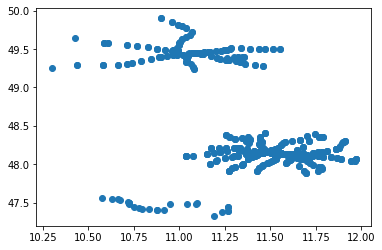

In [13]:
plt.scatter(stops_sbahn['stop_lon'], stops_sbahn['stop_lat'])

## Remove trips/routes outside of Munich

The dataset contains routes in Nurnbern and Austria, which we want to filter out

In [14]:
stops_to_drop = stops_sbahn.loc[(stops_sbahn['stop_lat'] < 47.8) | (stops_sbahn['stop_lat'] > 49)].copy()
stops_sbahn.drop(stops_to_drop.index, inplace=True)

Now to propagate throughout the other dataframes...  
We only wish to keep trips that are exclusively in Munich

In [15]:
trips_to_drop = pd.merge(
    stops_to_drop.loc[:, 'stop_id'],
    stop_times_sbahn.loc[:, ['stop_id', 'trip_id']],
    how='inner',
    on='stop_id'
).loc[:, 'trip_id'].drop_duplicates()
print(len(trips_to_drop.index), 'trips to be deleted')

700 trips to be deleted


In [16]:
trips_sbahn.drop(trips_sbahn.loc[trips_sbahn['trip_id'].isin(trips_to_drop)].index, inplace=True)

In [19]:
services_to_keep = trips_sbahn['service_id'].drop_duplicates()
print(f'Removed {len(services_to_keep.index)} services')
calendar.drop(calendar.loc[~calendar['service_id'].isin(services_to_keep)].index, inplace=True)

Removed 55 services


In [ ]:
del stops_to_drop
del trips_to_drop
del services_to_keep

# Cluster stops

The dataset has multiple entries per station, which is prejudicial for the OMNeT++ configurations.

In [ ]:
stops_sbahn[stops_sbahn['stop_name'].str.contains('Laim')]

Some station names are weird, so we'll do a first pass and the manually set some names

In [ ]:
stops_sbahn['stop_name'] = stops_sbahn.loc[:, 'stop_name']\
    .str.removeprefix('München')\
    .str.removesuffix('(Oberbay)')\
    .str.strip(' -')

In [ ]:
# Manual overrides of odd station names
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Ost', 'stop_name'] = 'Ostbahnhof'
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Hbf Gl.27-36', 'stop_name'] = 'Hbf'
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Hbf (tief)', 'stop_name'] = 'Hbf'
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Schwabhausen(b Dachau)', 'stop_name'] = 'Schwabhausen'
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Altomünster, Bahnhof', 'stop_name'] = 'Altomünster'

In [ ]:
CLUSTER_RANGE = 0.0055

class Cluster:
    def __init__(self) -> None:
        self.name = None
        self.id = -1
        self.lon = 0
        self.lat = 0
        self.stop_ids = set()
    
    def belongs(self, row: pd.Series):
        if self.name == 'Baierbrunn' and row['stop_name'] == 'Baierbrunn':
            return True

        return abs(self.lon - row['stop_lon']) <= CLUSTER_RANGE \
            and abs(self.lat - row['stop_lat']) <= CLUSTER_RANGE

    def add(self, index: int, row: pd.Series) -> None:
        n_members = len(self.stop_ids)

        self.lon = ((self.lon * n_members) + row['stop_lon']) / (n_members + 1)
        self.lat = ((self.lat * n_members) + row['stop_lat']) / (n_members + 1)

        name = row['stop_name']
        if self.name == None:
            self.id = index
            self.name = name
        elif self.name != name:
            print(f'Conflicting stop names "{name}" [{index}]  and "{self.name}" [{self.id}]')

        self.stop_ids.add(index)
    
    def get_dict(self) -> dict:
        d = { self.id: self.id }
        for stop in self.stop_ids:
            d[stop] = self.id
        return d

In [ ]:
st = stops_sbahn.set_index('stop_id')

clusters = []
for index, row in st.iterrows():

    cluster = None
    # Try to find match in existing cluster    
    for c in clusters:
        if c.belongs(row):
            if cluster == None:
                if c.name == row['stop_name']:
                    cluster = c
                else:
                    print(f'"{row["stop_name"]}" Joined cluster: "{c.name}"')
            else:
                if row['stop_name'] == c.name:
                    cluster = c
                elif row['stop_name'] == cluster.name:
                    cluster = cluster
                else:
                    print(f'"{row["stop_name"]}" Could fit multiple clusters: "{c.name}" and "{cluster.name}"')

 
    # If no cluster found, create another
    if cluster == None:
        cluster = Cluster()
        clusters.append(cluster)
    
    cluster.add(index, row)

# Create map of old -> new keys
# Build new dataframe from clusters
stop_update_map = dict()
data = []
for c in clusters:
    stop_update_map.update(c.get_dict())
    data.append((c.id, c.name, c.lon, c.lat))
stops_sbahn = pd.DataFrame(data=data, columns=['stop_id', 'stop_name', 'stop_lon', 'stop_lat'])

del st

print(f'Clustering resulted in {len(stops_sbahn.index)} stops')

## Resulting München map

In [ ]:
plt.plot(stops_sbahn['stop_lon'], stops_sbahn['stop_lat'], ls='', marker='.')

for _, row in stops_sbahn.iterrows():
    x = row['stop_lon']
    y = row['stop_lat']
    plt.text(x * (1 + 0.0001), y * (1 + 0.0001) , row['stop_name'], fontsize=6)

### Propagate the new clusters to the stop_times dataframe

In [ ]:
for old, new in stop_update_map.items():
    if old != new:
        stop_times_sbahn.loc[stop_times_sbahn['stop_id'] == old, 'stop_id'] = new
del stop_update_map

# Export the data back out

In [ ]:
os.makedirs(DEST_DIR, exist_ok=True)

stops_sbahn.to_csv(os.path.join(DEST_DIR, 'stops.txt'), index=False, float_format="%.6f")
stop_times_sbahn.to_csv(os.path.join(DEST_DIR, 'stop_times.txt'), index=False)
trips_sbahn.to_csv(os.path.join(DEST_DIR, 'trips.txt'), index=False)
routes_sbahn.to_csv(os.path.join(DEST_DIR, 'routes.txt'), index=False)
calendar.to_csv(os.path.join(DEST_DIR, 'calendar.txt'), index=False)

In [ ]:
shutil.copy(src=os.path.join(SRC_DIR, 'calendar_dates.txt'),
    dst=os.path.join(DEST_DIR, 'calendar_dates.txt'));